**K-State Honor Code: A. Marsh "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."**

In [149]:
#Import Packages
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# import the scatter_matrix functionality
from pandas.plotting import scatter_matrix

#Ignore Warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [150]:
#Import Data
df = pd.read_csv("movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [151]:
# Index Movie Title
#df = df.set_index('movie_title')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [152]:
# Top 5 Scoring IMDB Movies
df['imdb_score'].sort_values(ascending=False).head()

2765    9.5
1937    9.3
3466    9.2
3207    9.1
4409    9.1
Name: imdb_score, dtype: float64

In [153]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

# 1. Business understanding: The goal of this project is to predict movie success. Search Google using such key words as “predicting movie success” and understand the background of this prediction problem. 
Based on this research, write a summary of this business problem you’re trying to solve. Use bulleted lists and/or numbers in markdown cells. Answer the following questions as well:

• What are the project’s goals?

**The projects goals are to use a variety of information to help predict the success of a movie. In this project, success is determined by an IMDB score. This is important because the financial investment for a movie is extreme and a ridiculous amount of money is put into advertising and production. It is crucial for success, or else the producer is extremely in debt for the movie.**

• If you’re hired as a data/business analyst to predict how well a movie will perform in
theaters, what kind of data would you collect?

**I would collect as much possible information as I can. The first data points that come to my mind are movie gross, budget, actors, money spent on marketing, genre, runtime, director, reviews, rotten tomatoes score, money spent to produce, and social media likes. In this analysis, the more information, the better.**

• What variables are highly correlated to imdb score? In this project, you will use
imdb_score to measure a movie’s success.

**I would predict that gross, reviews, budget, actors, and director will be highly correlated with a movie's IMDB score.**

# 2. Data understanding: The dataset contains a large number of variables with different types (e.g., numerical, categorial). Provide a brief summary of data understanding.
Specifically, you need to:

• Describe data

In [154]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


• Identify data quality issues

In [155]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

• Identify data types

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

• Identify value counts of a selective list of columns considered to be important to
predict a movie’s success (imdb_score)

In [157]:
df['genres'].value_counts().head()

Drama                   236
Comedy                  209
Comedy|Drama            191
Comedy|Drama|Romance    187
Comedy|Romance          158
Name: genres, dtype: int64

In [158]:
df['actor_1_name'].value_counts().head()

Robert De Niro       49
Johnny Depp          41
Nicolas Cage         33
J.K. Simmons         31
Denzel Washington    30
Name: actor_1_name, dtype: int64

In [159]:
df['actor_2_name'].value_counts().head()

Morgan Freeman     20
Charlize Theron    15
Brad Pitt          14
James Franco       11
Meryl Streep       11
Name: actor_2_name, dtype: int64

# 3. Data preparation: Real-world datasets need to be pre-processed (e.g., cleaning, transforming) prior to formal analysis. Perform all necessary data cleaning and transformation activities. 
If necessary, you need to create new variables from existing variables. See an example.

#### Remove Missing Values

In [160]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

Removing all null values would result in losing a lot of the data. Lets drop some unnecessary columns first, then remove null values.

In [161]:
#Drop Unnecessary Columns
df1 = df[['num_critic_for_reviews', 'duration', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross',
        'genres', 'actor_1_name', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'num_user_for_reviews',
       'country', 'budget', 'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes', 'director_name']]

In [162]:
#Count number of rows from original data set
len(df)

5043

In [163]:
#Count number of rows after drop null values
df1 = df1.dropna()
len(df1)

3879

By removing some of the columns, we minimize the amount of data we lose by dropping null values. This larger sample size helps secure our confidence in the analysis.

In [164]:
# Identify new df1 data types
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3879 entries, 0 to 5042
Data columns (total 18 columns):
num_critic_for_reviews       3879 non-null float64
duration                     3879 non-null float64
actor_3_facebook_likes       3879 non-null float64
actor_2_name                 3879 non-null object
actor_1_facebook_likes       3879 non-null float64
gross                        3879 non-null float64
genres                       3879 non-null object
actor_1_name                 3879 non-null object
num_voted_users              3879 non-null int64
cast_total_facebook_likes    3879 non-null int64
actor_3_name                 3879 non-null object
num_user_for_reviews         3879 non-null float64
country                      3879 non-null object
budget                       3879 non-null float64
actor_2_facebook_likes       3879 non-null float64
imdb_score                   3879 non-null float64
movie_facebook_likes         3879 non-null int64
director_name                3879 non

In [165]:
#What does our df1 look like?
df1.head()

,num_critic_for_reviews,duration,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,num_user_for_reviews,country,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,director_name
0,723.0,178.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,Wes Studi,3054.0,USA,237000000.0,936.0,7.9,33000,James Cameron
1,302.0,169.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,48350,Jack Davenport,1238.0,USA,300000000.0,5000.0,7.1,0,Gore Verbinski
2,602.0,148.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,11700,Stephanie Sigman,994.0,UK,245000000.0,393.0,6.8,85000,Sam Mendes
3,813.0,164.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,1144337,106759,Joseph Gordon-Levitt,2701.0,USA,250000000.0,23000.0,8.5,164000,Christopher Nolan
5,462.0,132.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,212204,1873,Polly Walker,738.0,USA,263700000.0,632.0,6.6,24000,Andrew Stanton


In [166]:
#How many data points do we have in df1?
len(df1)

3879

#### Create Columns

In [167]:
# Create a profit column using gross - budget
df1['profit'] = df1['gross'] - df1['budget']
df1[['gross', 'budget', 'profit']].head()

,gross,budget,profit
0,760505847.0,237000000.0,523505847.0
1,309404152.0,300000000.0,9404152.0
2,200074175.0,245000000.0,-44925825.0
3,448130642.0,250000000.0,198130642.0
5,73058679.0,263700000.0,-190641321.0


In [168]:
# Create a % critical reviews column using # of critical reviews / Total # of reviews
df1['percent_crit_reviews'] = (df1['num_critic_for_reviews'] / df1['num_user_for_reviews']) * 100
df1.percent_crit_reviews = df1.percent_crit_reviews.round(1)
df1[['num_critic_for_reviews', 'num_user_for_reviews','percent_crit_reviews']].head()

,num_critic_for_reviews,num_user_for_reviews,percent_crit_reviews
0,723.0,3054.0,23.7
1,302.0,1238.0,24.4
2,602.0,994.0,60.6
3,813.0,2701.0,30.1
5,462.0,738.0,62.6


In [169]:
# Seperate films by if the were made in the US or made in a foreign country based on country produced column 
import numpy as np
df1['us_or_foreign_film'] = np.where(df1['country'] == 'USA','US Film','Foreign Film')
df1[['country','us_or_foreign_film']].head()

,country,us_or_foreign_film
0,USA,US Film
1,USA,US Film
2,UK,Foreign Film
3,USA,US Film
5,USA,US Film


Helped get rid of some of our null values while still keeping a large enough sample size to ensure confidence. Created 3 new columns to further analysis.

# 4. Business intelligence: Potentially, you can answer a lot of interesting questions using business intelligence techniques we’ve learned. The focus should be on what variables are good predictors for a movie’s success. 
You must use a variety of data visualization and business intelligence techniques. This is the most important component of this project. If this section is “too thin”, your project will receive a very low grade. You can find some sample business questions and analysis from

• https://nycdatascience.com/blog/student-works/machine-learning/movie-ratingprediction/

#### What is the average budget spent on movies with an IMDB score higher than the average of the sample?

In [170]:
df1['imdb_score'].mean()

6.462309873678765

In [171]:
df2 = df1.drop(df1[df1.imdb_score < 6.46].index)
df2['budget'].mean()

50082058.140566036

The average budget spend on movies that have scored the average imdb score or better is **$44,340,945.38**. If you want to create a movie that scores well on imdb score, you might consider having a budget this large.

#### What genre is the most common? What genre, on average, scores the best on IMDB score?

In [172]:
# Seperate the genres so we can do studies by genre
dfg = df1[['genres', 'imdb_score', 'profit']]
dfg.head()

,genres,imdb_score,profit
0,Action|Adventure|Fantasy|Sci-Fi,7.9,523505847.0
1,Action|Adventure|Fantasy,7.1,9404152.0
2,Action|Adventure|Thriller,6.8,-44925825.0
3,Action|Thriller,8.5,198130642.0
5,Action|Adventure|Sci-Fi,6.6,-190641321.0


In [173]:
b = pd.DataFrame(dfg.genres.str.split('|').tolist(), index=dfg.imdb_score).stack()
b = b.reset_index()[[0, 'imdb_score']] # genres variable is currently labeled 0
b.columns = ['genres', 'imdb_score'] # renaming genres
b.head()

,genres,imdb_score
0,Action,7.9
1,Adventure,7.9
2,Fantasy,7.9
3,Sci-Fi,7.9
4,Action,7.1


In [174]:
# Count number of movies made in each genre
b.groupby('genres')['imdb_score'].count().sort_values(ascending=False).head(10)

genres
Drama        1958
Comedy       1511
Thriller     1129
Action        969
Romance       887
Adventure     792
Crime         720
Fantasy       515
Sci-Fi        501
Family        452
Name: imdb_score, dtype: int64

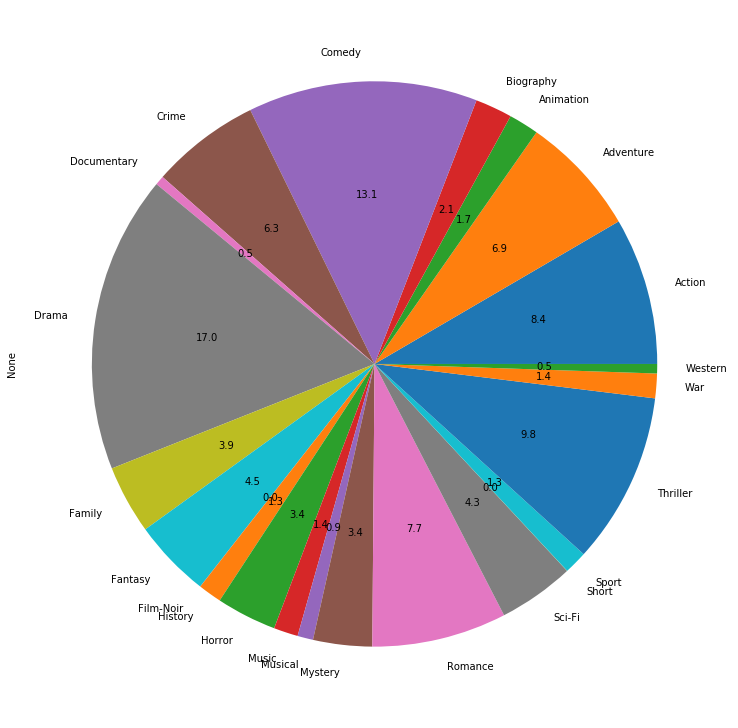

In [175]:
b.groupby('genres').size().plot(kind='pie', autopct='%.1f', figsize=(13,13))

Overwhelmingly, Drama is the most common genre incorporated in the movies. Followed by Comedy and Thriller. None of these come across as surprising being that they are the most common genres that I would have thought of.

In [176]:
# Sort by average IMDB score grouped by genre
b.groupby('genres')['imdb_score'].mean().sort_values(ascending=False).head(10)

genres
Film-Noir      7.700000
Biography      7.141803
History        7.125161
Short          7.100000
War            7.048148
Documentary    6.981967
Drama          6.781971
Western        6.740323
Animation      6.694949
Sport          6.607237
Name: imdb_score, dtype: float64

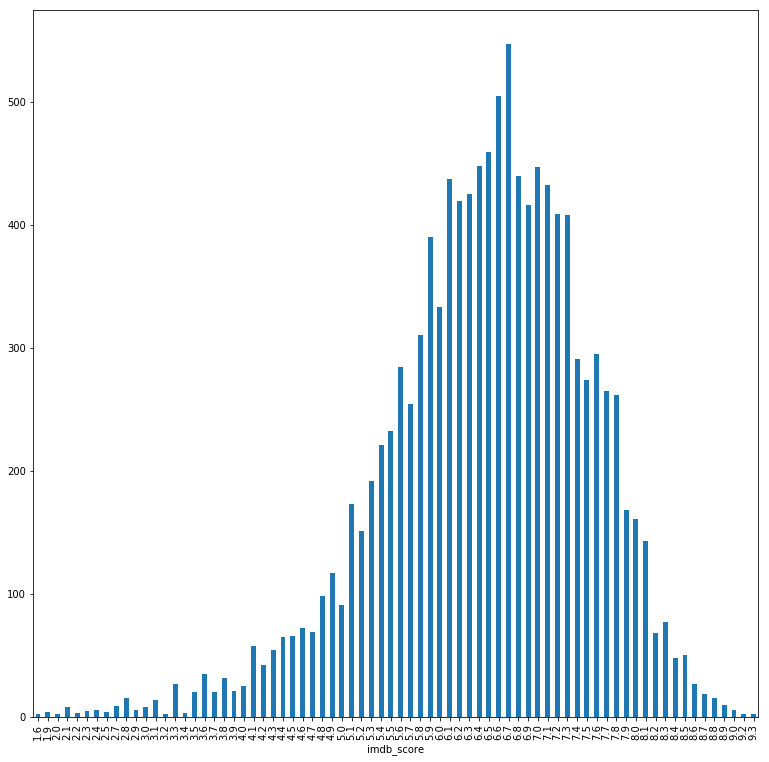

In [177]:
b.groupby('imdb_score').size().plot(kind='bar', figsize=(13,13))

You can see that the more informational movies (Film-Noir, Biography, History, etc) are the highest scoring films, on average, for IMDB score. Some of this could be skewed by sample size in that there are way less movies in this genre than some of the more common genres. Of the 10 most common genres, Drama scores the highest in terms of average IMDB score.

#### What genre, on average, scores the best on profit?

In [178]:
# Lets make the claim that profit is a better explanation of success than IMDB Score
p = pd.DataFrame(dfg.genres.str.split('|').tolist(), index=dfg.profit).stack()
p = p.reset_index()[[0, 'profit']] # genres variable is currently labeled 0
p.columns = ['genres', 'profit'] # renaming genres
p.head()

,genres,profit
0,Action,523505847.0
1,Adventure,523505847.0
2,Fantasy,523505847.0
3,Sci-Fi,523505847.0
4,Action,9404152.0


In [179]:
# Sort by most profit made grouped by genre
p.groupby('genres')['profit'].mean().sort_values(ascending=False).head(10)

genres
Family         2.135336e+07
Fantasy        1.682532e+07
Music          1.561888e+07
Musical        1.397017e+07
Adventure      1.358436e+07
Sport          1.169472e+07
Mystery        1.036474e+07
Romance        1.000307e+07
Documentary    9.973057e+06
Comedy         8.207766e+06
Name: profit, dtype: float64

If you would rather look at profit made instead of IMDB score as a definition of success, that changes what film you likely want to create. Here, Family and Fantasy films generate the most profit.

#### Is percent of critical reviews a good indication or reflection of a high IMDB score?

In [180]:
# Study if percent of critical reviews has any effect on IMDB Score
dfp = df1[['percent_crit_reviews', 'imdb_score', 'profit']]
dfp.sort_values('imdb_score', ascending=False).head(15)

,percent_crit_reviews,imdb_score,profit
1937,4.8,9.3,3341469.0
3466,9.3,9.2,128821952.0
66,13.8,9.0,348316061.0
2837,22.9,9.0,44300000.0
4498,23.2,8.9,4900000.0
1874,13.7,8.9,74067179.0
3355,9.8,8.9,99930000.0
339,10.3,8.9,283019252.0
836,10.7,8.8,274691196.0
97,22.9,8.8,132568851.0


In [181]:
dfp['percent_crit_reviews'].mean()

80.81198762567664

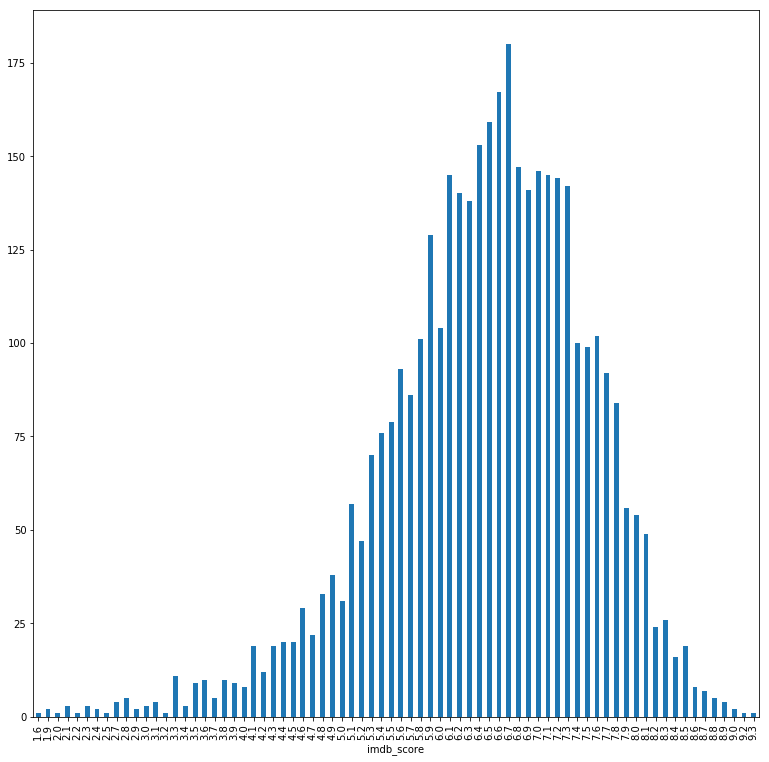

In [182]:
dfp.groupby('imdb_score').size().plot(kind='bar', figsize=(13,13))

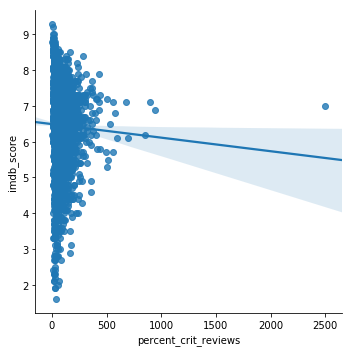

In [183]:
# Linear Regression between percentage of critical reviews and IMDB score
sns.lmplot("percent_crit_reviews","imdb_score", dfp)

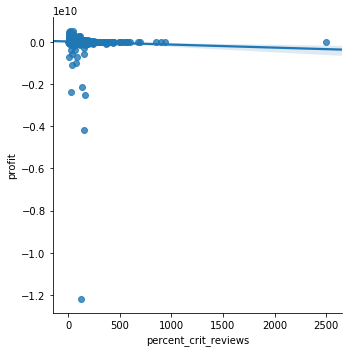

In [184]:
sns.lmplot("percent_crit_reviews","profit", dfp)

In [185]:
dfp.sort_values('profit', ascending=False).head(15)

,percent_crit_reviews,imdb_score,profit
0,23.7,7.9,523505847.0
29,49.9,7.0,502177271.0
26,12.5,7.7,458672302.0
3024,19.2,8.7,449935665.0
3080,41.7,7.9,424449459.0
17,40.8,8.1,403279547.0
794,40.8,8.1,403279547.0
509,28.4,8.5,377783777.0
240,8.9,6.5,359544677.0
66,13.8,9.0,348316061.0


It seems pretty clear to me that the movies with the best IMDB score are well below the mean for percentage of critical reviews. The lower this percentage, the higher your IMDB score... with a few exceptions. This could be a good tell for IMDB score success.

#### What director had the highest average IMDB score?

In [186]:
# Create a new data set with director name and IMDB score
d = df1[['director_name','imdb_score', 'profit']]

In [187]:
# Which director created the most movies
d.groupby('director_name')['imdb_score'].count().sort_values(ascending=False).head(10)

director_name
Steven Spielberg     25
Clint Eastwood       19
Woody Allen          19
Ridley Scott         17
Martin Scorsese      16
Tim Burton           16
Steven Soderbergh    16
Renny Harlin         15
Spike Lee            15
Oliver Stone         13
Name: imdb_score, dtype: int64

In [188]:
# Which director has the highest average IMDB score
d.groupby('director_name')['imdb_score'].mean().sort_values(ascending=False).head(10)

director_name
Charles Chaplin      8.600000
Tony Kaye            8.600000
Damien Chazelle      8.500000
Alfred Hitchcock     8.500000
Ron Fricke           8.500000
Majid Majidi         8.500000
Sergio Leone         8.433333
Christopher Nolan    8.425000
Asghar Farhadi       8.400000
Richard Marquand     8.400000
Name: imdb_score, dtype: float64

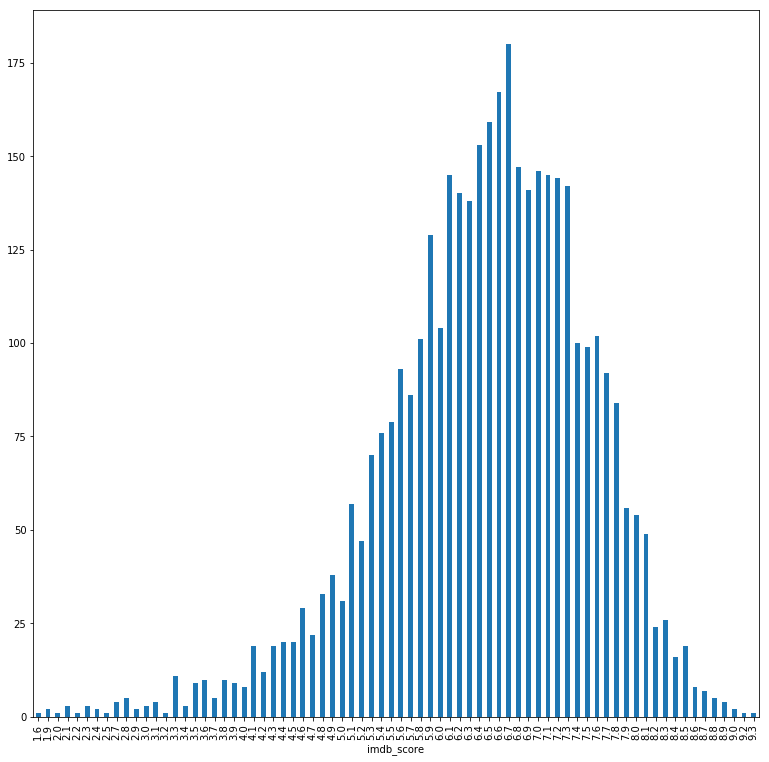

In [189]:
d.groupby('imdb_score').size().plot(kind='bar', figsize=(13,13))

In [190]:
# With Profit
d.groupby('director_name')['profit'].mean().sort_values(ascending=False).head(10)

director_name
Tim Miller          305024263.0
George Lucas        277328296.0
Richard Marquand    276625409.0
Kyle Balda          262029560.0
Colin Trevorrow     252717531.5
Chris Buck          250736600.0
Joss Whedon         250221657.0
Yarrow Cheney       248505540.0
Pierre Coffin       237275640.0
Lee Unkrich         214984497.0
Name: profit, dtype: float64

#### Is there a relationship between movie facebook likes and IMDB score?

In [191]:
# Create a new data set with movie facebook likes and IMDB score
mfl = df1[['movie_facebook_likes','imdb_score', 'profit']]
mfl = mfl.replace(0, np.nan)
mfl = mfl.dropna(how='all', axis=0)
mfl = mfl.dropna()
mfl.sort_values('movie_facebook_likes', ascending=False).head(15)

,movie_facebook_likes,imdb_score,profit
96,349000.0,8.6,22991439.0
296,199000.0,8.5,62804648.0
10,197000.0,6.9,80249062.0
128,191000.0,8.1,3629485.0
179,190000.0,8.1,48635922.0
97,175000.0,8.8,132568851.0
99,166000.0,7.9,123001229.0
2614,165000.0,8.1,77121452.0
3,164000.0,8.5,198130642.0
278,153000.0,8.1,120430993.0


In [192]:
mfl['imdb_score'].mean()

6.467711301044638

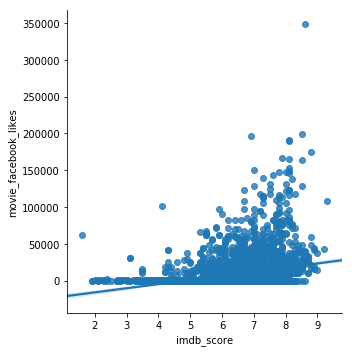

In [193]:
# Linear Regression between movie facebook likes and IMDB score
sns.lmplot("imdb_score", "movie_facebook_likes", df1)

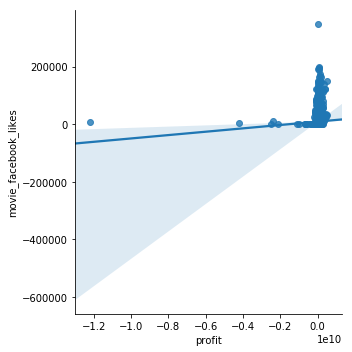

In [194]:
sns.lmplot("profit", "movie_facebook_likes", df1)

It seems that there is a relationship between movie facebook likes and imdb score. As you can see by the groupby, the top 15 movies in terms of facebook likes are all well above the average IMDB score. You can also see by the linear regression plot that there is a positive linear regression.

#### Does whether it is a US film or foreign film play any role on IMDB Score?

In [195]:
df1.head()

,num_critic_for_reviews,duration,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,...,num_user_for_reviews,country,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,director_name,profit,percent_crit_reviews,us_or_foreign_film
0,723.0,178.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,...,3054.0,USA,237000000.0,936.0,7.9,33000,James Cameron,523505847.0,23.7,US Film
1,302.0,169.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,48350,...,1238.0,USA,300000000.0,5000.0,7.1,0,Gore Verbinski,9404152.0,24.4,US Film
2,602.0,148.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,11700,...,994.0,UK,245000000.0,393.0,6.8,85000,Sam Mendes,-44925825.0,60.6,Foreign Film
3,813.0,164.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,1144337,106759,...,2701.0,USA,250000000.0,23000.0,8.5,164000,Christopher Nolan,198130642.0,30.1,US Film
5,462.0,132.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,212204,1873,...,738.0,USA,263700000.0,632.0,6.6,24000,Andrew Stanton,-190641321.0,62.6,US Film


In [196]:
# Create a new data set with whether the film was made in the US or foreign and IMDB score
country = df1[['us_or_foreign_film','imdb_score', 'profit']]
country.head()

,us_or_foreign_film,imdb_score,profit
0,US Film,7.9,523505847.0
1,US Film,7.1,9404152.0
2,Foreign Film,6.8,-44925825.0
3,US Film,8.5,198130642.0
5,US Film,6.6,-190641321.0


In [197]:
# How many movies were made in the US and in foreign countries
country.groupby('us_or_foreign_film')['imdb_score'].count().sort_values(ascending=False).head(10)

us_or_foreign_film
US Film         3068
Foreign Film     811
Name: imdb_score, dtype: int64

In [198]:
# What is the average IMDB score in the two categories
country.groupby('us_or_foreign_film')['imdb_score'].mean().sort_values(ascending=False).head(10)

us_or_foreign_film
Foreign Film    6.753761
US Film         6.385267
Name: imdb_score, dtype: float64

In [199]:
# What is the average profit in the two categories
country.groupby('us_or_foreign_film')['profit'].mean().sort_values(ascending=False).head(10)

us_or_foreign_film
US Film         1.727015e+07
Foreign Film   -3.710301e+07
Name: profit, dtype: float64

Not much of a difference between the means and the sample size is significantly different. However, it appears US Films scored way higher in profit than foreign films. This could be true, but my suspicion is that there may be some money conversion issues. Maybe T-Testing will show us more information.

### Lets run T-Testing for all of our questions above

In [200]:
# Create a binary variable with an arbitrary IMDB score threshold (movies above a 7 get a 1, movies below a 7 get a 0)
def f(row):
    if row['imdb_score'] < 7:
        val = 0
    elif row['imdb_score'] == 7:
        val = 0
    else:
        val = 1
    return val
df1['binary_imdb'] = df1.apply(f, axis=1)

df1[['imdb_score', 'binary_imdb']].head(10)

,imdb_score,binary_imdb
0,7.9,1
1,7.1,1
2,6.8,0
3,8.5,1
5,6.6,0
6,6.2,0
7,7.8,1
8,7.5,1
9,7.5,1
10,6.9,0


In [201]:
# IMDB Score & Profit
Prof1 = df1[df1['binary_imdb'] == 1]['profit']
Prof2 = df1[df1['binary_imdb'] == 0]['profit']

stats.ttest_ind(Prof1, Prof2)

Ttest_indResult(statistic=2.8443171707728223, pvalue=0.00447399254964069)

**Profit is statistically significant in predicting IMDB score with a pvalue < .05.**

In [202]:
# IMDB Score & Percent of Critical Reviews
Per1 = df1[df1['binary_imdb'] == 1]['percent_crit_reviews']
Per2 = df1[df1['binary_imdb'] == 0]['percent_crit_reviews']

stats.ttest_ind(Per1, Per2)

Ttest_indResult(statistic=-4.507093497053408, pvalue=6.766116406279982e-06)

**Percent of critical reviews is statistically significant in predicting IMDB score with a pvalue < .05.**

In [203]:
# IMDB Score & Movie Facebook Likes
mfbl1 = df1[df1['binary_imdb'] == 1]['movie_facebook_likes']
mfbl2 = df1[df1['binary_imdb'] == 0]['movie_facebook_likes']

stats.ttest_ind(mfbl1, mfbl2)

Ttest_indResult(statistic=16.352813977725997, pvalue=3.531156479998255e-58)

**Movie total facebook likes is statistically significant in predicting IMDB score with a pvalue < .05.**

In [204]:
# IMDB Score & Where the film was made
us1 = df1[df1['us_or_foreign_film'] == 'US Film']['imdb_score']
us2 = df1[df1['us_or_foreign_film'] == 'Foreign Film']['imdb_score']

stats.ttest_ind(us1, us2)

Ttest_indResult(statistic=-8.92310882394635, pvalue=6.854805139156434e-19)

**Where the film was made is statistically significant in predicting IMDB score with a pvalue < .05.**

In [205]:
# Now lets assume profit is a better predictor of success and use an arbitrary value of the mean 
#(1 is profit above mean, 0 is profit below mean)
df1['profit'].mean()

5902111.680845579

In [206]:
def f(row):
    if row['profit'] < 5902112:
        val = 0
    elif row['profit'] == 5902112:
        val = 0
    else:
        val = 1
    return val
df1['binary_profit'] = df1.apply(f, axis=1)

df1[['profit', 'binary_profit']].head(10)

,profit,binary_profit
0,523505847.0,1
1,9404152.0,1
2,-44925825.0,0
3,198130642.0,1
5,-190641321.0,0
6,78530303.0,1
7,-59192738.0,0
8,208991599.0,1
9,51956980.0,1
10,80249062.0,1


In [207]:
# Profit & Percent of Critical Reviews
Per3 = df1[df1['binary_profit'] == 1]['percent_crit_reviews']
Per4 = df1[df1['binary_profit'] == 0]['percent_crit_reviews']

stats.ttest_ind(Per3, Per4)

Ttest_indResult(statistic=-12.745001063579302, pvalue=1.7759131295305042e-36)

**Percent of Critical Reviews is statistically significant in predicting Profit with a pvalue < .05.**

In [208]:
# Profit & Movie Facebook Likes
mfbl3 = df1[df1['binary_profit'] == 1]['movie_facebook_likes']
mfbl4 = df1[df1['binary_profit'] == 0]['movie_facebook_likes']

stats.ttest_ind(mfbl3, mfbl4)

Ttest_indResult(statistic=10.249134274461834, pvalue=2.434198787853895e-24)

**Movie Total Facebook Likes is statistically significant in predicting Profit with a pvalue < .05.**

In [209]:
# Profit & Where the film was made
us3 = df1[df1['us_or_foreign_film'] == 'US Film']['profit']
us4 = df1[df1['us_or_foreign_film'] == 'Foreign Film']['profit']

stats.ttest_ind(us3, us4)

Ttest_indResult(statistic=6.1080210184212165, pvalue=1.1080690901796772e-09)

**Where the film was made is statistically significant in predicting Profit with a pvalue < .05.**

# 5. Correlation analysis: This extends the previous section (business intelligence).

• Perform correlation analysis and discuss the results. Again, what variables are correlated to imdb_score? How are some key variables correlated to each other?

In [210]:
df1.corr()

,num_critic_for_reviews,duration,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,percent_crit_reviews,binary_imdb,binary_profit
num_critic_for_reviews,1.000000,0.237479,0.256868,0.171956,0.476702,0.600255,0.243314,0.573124,0.107609,0.258598,0.342038,0.703614,0.041219,0.009422,0.286974,0.214439
duration,0.237479,1.000000,0.127651,0.086513,0.251676,0.343396,0.123389,0.355398,0.069484,0.131372,0.360534,0.221269,0.009302,-0.187637,0.290461,0.074083
actor_3_facebook_likes,0.256868,0.127651,1.000000,0.253813,0.302987,0.271095,0.490192,0.209660,0.041212,0.554542,0.064805,0.271881,0.052927,-0.049321,0.048057,0.107112
actor_1_facebook_likes,0.171956,0.086513,0.253813,1.000000,0.148514,0.183216,0.945213,0.126985,0.017503,0.391918,0.092346,0.131394,0.028595,-0.047821,0.060470,0.059940
gross,0.476702,0.251676,0.302987,0.148514,1.000000,0.630990,0.240291,0.552035,0.102059,0.256300,0.212334,0.375188,0.208073,-0.197723,0.162739,0.508379
num_voted_users,0.600255,0.343396,0.271095,0.183216,0.630990,1.000000,0.253348,0.782275,0.068688,0.248635,0.474604,0.522418,0.127074,-0.226292,0.411204,0.337455
cast_total_facebook_likes,0.243314,0.123389,0.490192,0.945213,0.240291,0.253348,1.000000,0.184689,0.030041,0.642856,0.105451,0.206429,0.044573,-0.060268,0.069547,0.092318
num_user_for_reviews,0.573124,0.355398,0.209660,0.126985,0.552035,0.782275,0.184689,1.000000,0.073189,0.192410,0.321137,0.376521,0.098297,-0.314814,0.302435,0.265811
budget,0.107609,0.069484,0.041212,0.017503,0.102059,0.068688,0.030041,0.073189,1.000000,0.036907,0.029228,0.054620,-0.951770,-0.010643,0.004637,-0.016739
actor_2_facebook_likes,0.258598,0.131372,0.554542,0.391918,0.256300,0.248635,0.642856,0.192410,0.036907,1.000000,0.102007,0.232790,0.042760,-0.045404,0.069361,0.092627


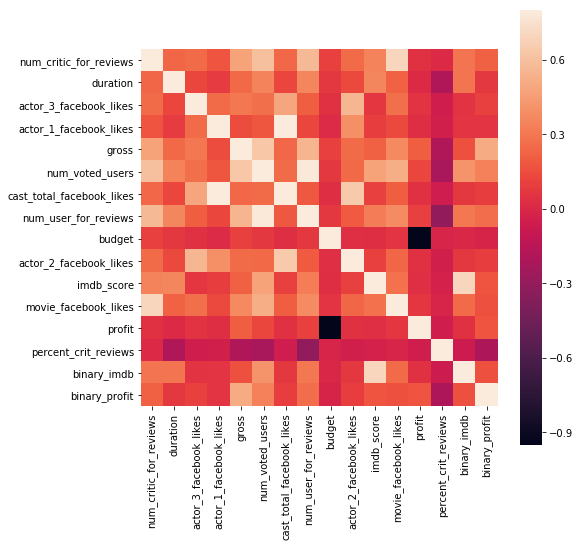

In [211]:
plt.figure(figsize=(8,8))
sns.heatmap(df1.corr(),vmax=.8, square=True)

Heatmap shows items that have a strong and weak correlation.

# 6. Storytelling: At the end, this is what your client is interested in. Develop useful insights from your analysis. Write a summery using bulleted lists and/or numbers in markdown cells. 

There are a variety of takeaways from this analysis. The first decision to make is whether you want IMDB Score or Profit to be a prediction of your success. If you are looking to create a quality movie, you would choose IMDB score. If you are looking to make a lot of money off your movie, you should use Profit. I will present findings for each determinant of success below. There will be some overlap.

## IMDB Score
#### 1) Genres 

I started by breaking down the movies by genre to determine if there was an impact of genre on IMDB score. We saw the following information as the top 5 genres that performed the highest on IMDB score. Genres Mean: Film-Noir 7.700000, Biography 7.141803, History 7.125161, Short 7.100000, War 7.048148

I then wanted to determine which genres were the most common and the following information shows which genres are the most common. Genres Count: Drama 1958, Comedy 1511, Thriller 1129, Action 969, Romance 887

As you can see, the movies that perform the best on IMDB score, aren't the same genres that are most commonly made. I found this to be very interesting. I think this is important to know leading into a decision on what film you want to make.

#### 2) Percent of Critical Reviews

Next, we investigated the relationship between IMDB score and percent of critcal reviews. We found that there was a negative relationship. The lower the percentage, the higher the IMDB score. This makes complete sense because, the less negative reviews you have, the higher scoring your movie should score. 

We also conducted a T-Test to prove if this coorelation is statistically significant. The P-Value was .000006766 which is clearly very strong and proves to be a statistically significant indicator.

#### 3) Directors 

I started by breaking down the directors to determine if there was an impact on the IMDB score. We saw the following information as the top 5 genres that performed the highest on IMDB score. Directors Mean IMDB Score: John Blanchard 9.5, Sadyk Sher-Niyaz 8.7, Mitchell Altieri 8.7, Cary Bell 8.7, Mike Mayhall 8.6

I then wanted to determine which directors produced the most common and the following information shows which directors created the most movies. Directors Count: Steven Spielberg 26, Woody Allen 22, Martin Scorsese 20, Clint Eastwood 20, Ridley Scott 17

Similar to the genres, you can see, much like the genres, those that produced the most movies didn't necessarily score the highest average on IMDB. My guess is that those who averaged high only have directed one movie and that brings their average down.

#### 4) Facebook Likes

You can see a clear positive relationship between Facebook Likes and IMDB score. Meaning, the higher the amount of Facebook Likes, the higher the IMDB score. This statistic is statistically significant with a P-Value of 3.531156479998255e-58 which means that this can be used as a solid predictor of high IMDB score.

#### 5) US or Foreign Film

We found the following average IMDB scores for US films vs. foreign films:

Foreign Film    6.753761
US Film         6.385267

As you can see, there is about .5 increase in IMDB score which is substantial enough to point out. We also ran a T-Test and got a P-Value of 6.854805139156434e-19. So it is in fact, statistically significant.

## Profit
#### 1) Genres 

I broke down by genre and also compared to profit and interestingly enough, found some different results! The following information is the mean profit per genre. Family 21353360, Fantasy 16825320, Music 15618880, Musical 13970170, Adventure 13584360.

This is very interesting because these 5 genres are not on either mean for IMDB or most commonly made films. This helps reinforce the idea that in order to help determine what movie to produce, you need to decide if "success" is determined by IMDB score or profit.

#### 2) Percent of Critical Reviews

It seems like there is a similar relationship as we noticed with IMDB Score, however it doesn't appear to be as strong with profit as the indication of success.

#### 3) Directors

When looking at profit instead of IMDB Score you see that the top 5 directors are all different. That information is as follows: Tim Miller 305024263.0, George Lucas 277328296.0, Richard Marquand 276625409.0, Kyle Balda 262029560.0, Colin Trevorrow 252717531.5

#### 4) Facebook Likes

There is not as clear of a relationship with profit and I would not recommend using this as a predictor. However, the P-Value is 2.434198787853895e-24. So some could argue that this is a statistically significant predictor. However, I think because of some profit descrepencies with exchange rate, we may not be able rely on this statistic. 

#### 5) US or Foreign Film

We ran this with Profit and got some results, but I would caution the validity of this information with currency problems that could have occured. We got the following information:

US Film         1.727015e+07
Foreign Film   -3.710301e+07

As you can see, the foreign films are clearly not looking right and I think this can be explained by the currency discrepency in our data. I would not recommend using this as a indicator for profit.

## Overall Findings and Decision

There is a lot of information to unpack here. I think the first question to determine is how do we want to define success? To me, as a creator, profit makes more sense. However, some of our information isn't as strong of a predictor with profit as it is IMDB score. I would use IMDB score to determine success. The five variables mentioned above are all strong columns to use. I think the best indication to use would be profit, budget, and percent of critical reviews.

Lastly, I wanted to point out that profit and IMDB score are highly correlated and that is why a lot of the information is similar between the two success determinants. There is so much information available we could analyze columns for days. However, I found these 5 variables to be the most interesting in terms of determining movie success.


## End Of Midterm
## ---------------------------------------------------------------------------------------------------------------------------------
## Beginning of Final Project

# IMDB Final

In [212]:
#Look at DataSet
df1.head()

,num_critic_for_reviews,duration,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,...,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,director_name,profit,percent_crit_reviews,us_or_foreign_film,binary_imdb,binary_profit
0,723.0,178.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,...,237000000.0,936.0,7.9,33000,James Cameron,523505847.0,23.7,US Film,1,1
1,302.0,169.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,48350,...,300000000.0,5000.0,7.1,0,Gore Verbinski,9404152.0,24.4,US Film,1,1
2,602.0,148.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,11700,...,245000000.0,393.0,6.8,85000,Sam Mendes,-44925825.0,60.6,Foreign Film,0,0
3,813.0,164.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,1144337,106759,...,250000000.0,23000.0,8.5,164000,Christopher Nolan,198130642.0,30.1,US Film,1,1
5,462.0,132.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,212204,1873,...,263700000.0,632.0,6.6,24000,Andrew Stanton,-190641321.0,62.6,US Film,0,0


In [213]:
#Look at Data Types
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3879 entries, 0 to 5042
Data columns (total 23 columns):
num_critic_for_reviews       3879 non-null float64
duration                     3879 non-null float64
actor_3_facebook_likes       3879 non-null float64
actor_2_name                 3879 non-null object
actor_1_facebook_likes       3879 non-null float64
gross                        3879 non-null float64
genres                       3879 non-null object
actor_1_name                 3879 non-null object
num_voted_users              3879 non-null int64
cast_total_facebook_likes    3879 non-null int64
actor_3_name                 3879 non-null object
num_user_for_reviews         3879 non-null float64
country                      3879 non-null object
budget                       3879 non-null float64
actor_2_facebook_likes       3879 non-null float64
imdb_score                   3879 non-null float64
movie_facebook_likes         3879 non-null int64
director_name                3879 non

## Model Building: Regression/Classification

In [214]:
# Import Regression Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols

import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy import stats

### Data Visualization


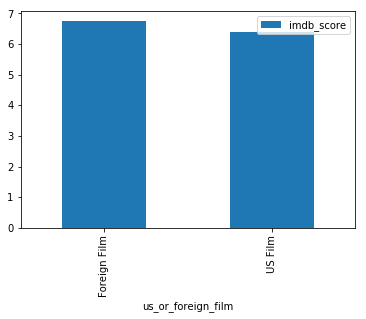

In [215]:
#Bar Chart showing score with US or Foreign Film
df1.groupby('us_or_foreign_film').mean().plot(y='imdb_score', kind='bar')

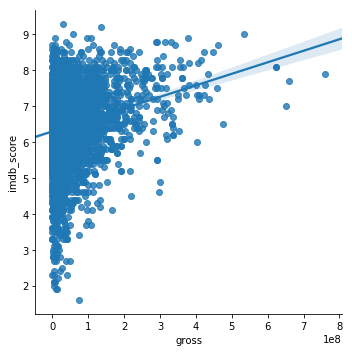

In [216]:
#Regression Plot with Gross & IMDB Score
sns.lmplot('gross','imdb_score',df1)

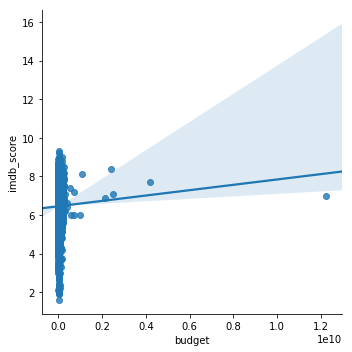

In [217]:
#Regression Plot with IMDB Score & Budget
sns.lmplot('budget','imdb_score',df1)

### Correlation Analysis

In [218]:
#Look at correlation
df1.corr()

,num_critic_for_reviews,duration,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,percent_crit_reviews,binary_imdb,binary_profit
num_critic_for_reviews,1.000000,0.237479,0.256868,0.171956,0.476702,0.600255,0.243314,0.573124,0.107609,0.258598,0.342038,0.703614,0.041219,0.009422,0.286974,0.214439
duration,0.237479,1.000000,0.127651,0.086513,0.251676,0.343396,0.123389,0.355398,0.069484,0.131372,0.360534,0.221269,0.009302,-0.187637,0.290461,0.074083
actor_3_facebook_likes,0.256868,0.127651,1.000000,0.253813,0.302987,0.271095,0.490192,0.209660,0.041212,0.554542,0.064805,0.271881,0.052927,-0.049321,0.048057,0.107112
actor_1_facebook_likes,0.171956,0.086513,0.253813,1.000000,0.148514,0.183216,0.945213,0.126985,0.017503,0.391918,0.092346,0.131394,0.028595,-0.047821,0.060470,0.059940
gross,0.476702,0.251676,0.302987,0.148514,1.000000,0.630990,0.240291,0.552035,0.102059,0.256300,0.212334,0.375188,0.208073,-0.197723,0.162739,0.508379
num_voted_users,0.600255,0.343396,0.271095,0.183216,0.630990,1.000000,0.253348,0.782275,0.068688,0.248635,0.474604,0.522418,0.127074,-0.226292,0.411204,0.337455
cast_total_facebook_likes,0.243314,0.123389,0.490192,0.945213,0.240291,0.253348,1.000000,0.184689,0.030041,0.642856,0.105451,0.206429,0.044573,-0.060268,0.069547,0.092318
num_user_for_reviews,0.573124,0.355398,0.209660,0.126985,0.552035,0.782275,0.184689,1.000000,0.073189,0.192410,0.321137,0.376521,0.098297,-0.314814,0.302435,0.265811
budget,0.107609,0.069484,0.041212,0.017503,0.102059,0.068688,0.030041,0.073189,1.000000,0.036907,0.029228,0.054620,-0.951770,-0.010643,0.004637,-0.016739
actor_2_facebook_likes,0.258598,0.131372,0.554542,0.391918,0.256300,0.248635,0.642856,0.192410,0.036907,1.000000,0.102007,0.232790,0.042760,-0.045404,0.069361,0.092627


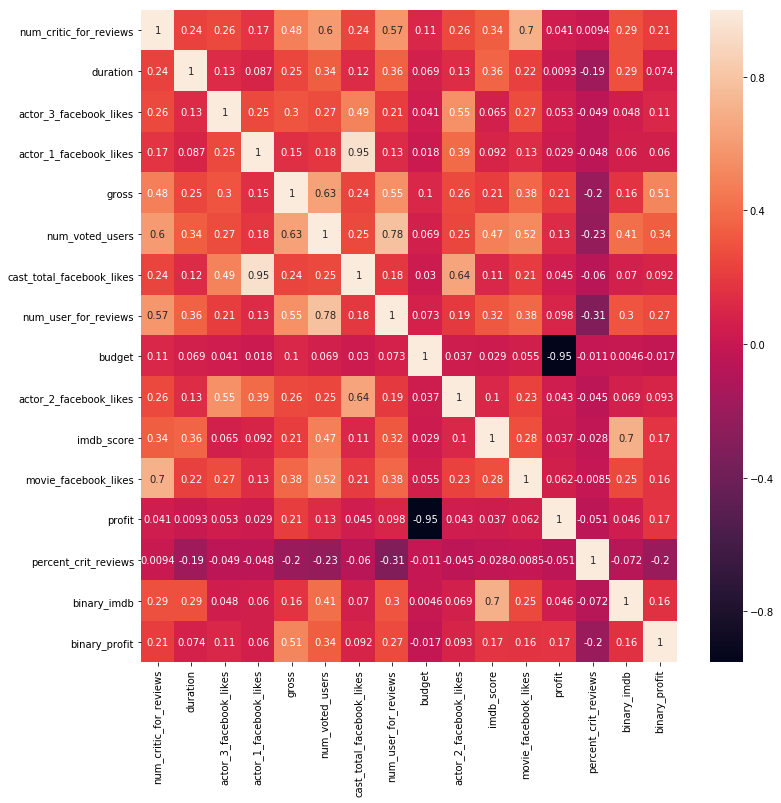

In [219]:
# correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(), annot=True);

In [220]:
# Use the Mean of Imdb Score for a arbitrary value to create a binary variable
df1['imdb_score'].mean()

6.462309873678765

In [221]:
#Assign Binary values based on mean IMDB Score
def f(row):
    if row['imdb_score'] < 6.46:
        val = 0
    elif row['imdb_score'] == 6.46:
        val = 0
    else:
        val = 1
    return val
df1['binary_imdb_score'] = df1.apply(f, axis=1)

df1[['imdb_score', 'binary_imdb_score']].head(10)

,imdb_score,binary_imdb_score
0,7.9,1
1,7.1,1
2,6.8,1
3,8.5,1
5,6.6,1
6,6.2,0
7,7.8,1
8,7.5,1
9,7.5,1
10,6.9,1


### T-Testing

In [222]:
# T-Test for gross & imdb_score
G1 = df1[df1['binary_imdb_score'] == 1]['gross']
G2 = df1[df1['binary_imdb_score'] == 0]['gross']

stats.ttest_ind(G1, G2)

Ttest_indResult(statistic=9.168769120599277, pvalue=7.57821406690572e-20)

In [223]:
# T-Test for Profit & imdb_score
P1 = df1[df1['binary_imdb_score'] == 1]['profit']
P2 = df1[df1['binary_imdb_score'] == 0]['profit']

stats.ttest_ind(P1, P2)

Ttest_indResult(statistic=1.3500406716840054, pvalue=0.17708174665922316)

In [224]:
# T-Test for Movie Facebook Likes & imdb_score
MFL1 = df1[df1['binary_imdb_score'] == 1]['movie_facebook_likes']
MFL2 = df1[df1['binary_imdb_score'] == 0]['movie_facebook_likes']

stats.ttest_ind(MFL1, MFL2)

Ttest_indResult(statistic=12.994841201526633, pvalue=7.983885812641951e-38)

In [225]:
#Look at all columns in DF1
df1.columns

Index(['num_critic_for_reviews', 'duration', 'actor_3_facebook_likes',
       'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres',
       'actor_1_name', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'num_user_for_reviews', 'country', 'budget',
       'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes',
       'director_name', 'profit', 'percent_crit_reviews', 'us_or_foreign_film',
       'binary_imdb', 'binary_profit', 'binary_imdb_score'],
      dtype='object')

### Multiple Regression Model

In [226]:
#Drop all categorical and string variables and create new dataset
df2 = df1.drop(['actor_2_name', 'genres', 'actor_1_name', 'director_name', 
                'us_or_foreign_film', 'actor_3_name', 'country', 'us_or_foreign_film', 'binary_imdb', 'binary_profit', 'binary_imdb_score', 'percent_crit_reviews'], axis=1)

In [227]:
#assigning columns to X and Y variables
y = df2['imdb_score'] 
X = df2.drop(['imdb_score'], axis =1)

In [228]:
#Look at X dataset
X.head()

,num_critic_for_reviews,duration,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,movie_facebook_likes,profit
0,723.0,178.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,936.0,33000,523505847.0
1,302.0,169.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,5000.0,0,9404152.0
2,602.0,148.0,161.0,11000.0,200074175.0,275868,11700,994.0,245000000.0,393.0,85000,-44925825.0
3,813.0,164.0,23000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,23000.0,164000,198130642.0
5,462.0,132.0,530.0,640.0,73058679.0,212204,1873,738.0,263700000.0,632.0,24000,-190641321.0


In [229]:
#Look at y dataset
y.head()

0    7.9
1    7.1
2    6.8
3    8.5
5    6.6
Name: imdb_score, dtype: float64

In [230]:
# Build Multiple Regression Model
model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)

In [231]:
#Print model
print('Coefficients: ', model1.coef_)
print("y-intercept ", model1.intercept_)

Coefficients:  [ 1.52493455e-03  1.17208668e-02  8.01402818e-05  8.16152213e-05
  3.74687044e+04  4.06542333e-06 -8.12814498e-05 -5.57505311e-04
 -3.74687044e+04  8.41967052e-05 -2.69139770e-06 -3.74687044e+04]
y-intercept  4.885802305319407


In [232]:
#Round coefficients to 5 decimal places
coef = ["%.5f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_critic_for_reviews', '0.00152'),
 ('duration', '0.01172'),
 ('actor_3_facebook_likes', '0.00008'),
 ('actor_1_facebook_likes', '0.00008'),
 ('gross', '37468.70441'),
 ('num_voted_users', '0.00000'),
 ('cast_total_facebook_likes', '-0.00008'),
 ('num_user_for_reviews', '-0.00056'),
 ('budget', '-37468.70441'),
 ('actor_2_facebook_likes', '0.00008'),
 ('movie_facebook_likes', '-0.00000'),
 ('profit', '-37468.70441')]

In [233]:
#Show dataframe with variables and coefficients
pd.DataFrame(list(zip(X.columns, np.transpose(model1.coef_))))

,0,1
0,num_critic_for_reviews,0.001525
1,duration,0.011721
2,actor_3_facebook_likes,0.000080
3,actor_1_facebook_likes,0.000082
4,gross,37468.704413
5,num_voted_users,0.000004
6,cast_total_facebook_likes,-0.000081
7,num_user_for_reviews,-0.000558
8,budget,-37468.704413
9,actor_2_facebook_likes,0.000084


In [234]:
#Print error and r-squared
print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))

mean square error:  0.7614447383456427
variance or r-squared:  0.31758296518682183


### Regression Model based on Regularization

In [235]:
#Regression model based on regularization
model1 = lm.Lasso(alpha=0.1)
model1.fit(X, y)
model1_y = model1.predict(X)

C:\Users\AndrewMarsh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [236]:
#Look at model1
model1

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [237]:
#Print model
print('Coefficients: ', model1.coef_)
print("y-intercept ", model1.intercept_)

Coefficients:  [ 1.48205256e-03  1.14616658e-02  7.42743231e-05  7.75412099e-05
 -1.92896614e-09  4.08078125e-06 -7.71999722e-05 -5.51743393e-04
  1.10025544e-11  8.00264682e-05 -2.65024616e-06  6.62802549e-11]
y-intercept  4.911815077999368


In [238]:
#Round coefficients to 5 decimal places
coef = ["%.5f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_critic_for_reviews', '0.00148'),
 ('duration', '0.01146'),
 ('actor_3_facebook_likes', '0.00007'),
 ('actor_1_facebook_likes', '0.00008'),
 ('gross', '-0.00000'),
 ('num_voted_users', '0.00000'),
 ('cast_total_facebook_likes', '-0.00008'),
 ('num_user_for_reviews', '-0.00055'),
 ('budget', '0.00000'),
 ('actor_2_facebook_likes', '0.00008'),
 ('movie_facebook_likes', '-0.00000'),
 ('profit', '0.00000')]

In [239]:
#Print error and r-squared
print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))

mean square error:  0.7611965649818198
variance or r-squared:  0.317805356529958


### Regression Model based on Feature Selection

In [240]:
#Regression model based on Feature selection
#select only 2 X variables
X_new = SelectKBest(f_regression, k=2).fit_transform(X, y)
X_new

array([[1.78000e+02, 8.86204e+05],
       [1.69000e+02, 4.71220e+05],
       [1.48000e+02, 2.75868e+05],
       ...,
       [8.10000e+01, 5.20550e+04],
       [9.50000e+01, 1.33800e+03],
       [9.00000e+01, 4.28500e+03]])

In [241]:
# this helps us find out which variables are selected
selector = SelectKBest(f_regression, k=5).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[ 0  1  5  7 10]


In [242]:
#Look at X dataset
X.head(2)

,num_critic_for_reviews,duration,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,movie_facebook_likes,profit
0,723.0,178.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,936.0,33000,523505847.0
1,302.0,169.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,5000.0,0,9404152.0


In [243]:
#Statsmodel using top 5 variables from feature selection
imdb_reg_model = ols("imdb_score~num_critic_for_reviews+duration+num_voted_users+num_user_for_reviews+movie_facebook_likes",df2)
imdb_reg = imdb_reg_model.fit()
print(imdb_reg.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     319.4
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          4.60e-287
Time:                        09:20:56   Log-Likelihood:                -5047.0
No. Observations:                3879   AIC:                         1.011e+04
Df Residuals:                    3873   BIC:                         1.014e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

In [244]:
#Show residual
imdb_reg.mse_resid

0.7912773439572872

In [245]:
#Show regression parameters
imdb_reg.params

Intercept                 4.852037
num_critic_for_reviews    0.001320
duration                  0.011376
num_voted_users           0.000004
num_user_for_reviews     -0.000597
movie_facebook_likes     -0.000003
dtype: float64

# Classification

### Create Imdb_Score Bins

In [246]:
#Create categories for imdb score bins
#Range of 0-3, 0 being worst
df2['imdb_score_bins'] = pd.cut(df2['imdb_score'], bins=[0, 4, 6, 8, float('Inf')], labels=[0,1,2,3])

In [247]:
#Show number in each bin
df2['imdb_score_bins'].value_counts()

2    2534
1    1085
3     162
0      98
Name: imdb_score_bins, dtype: int64

In [248]:
# Import  Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV

# Stats
from scipy import stats

### Decision Tree

In [249]:
#declare X variables and y variable
y = df2['imdb_score_bins'].astype(int)

X = df2.drop(['imdb_score_bins','imdb_score'], axis=1)

In [250]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3879 entries, 0 to 5042
Data columns (total 12 columns):
num_critic_for_reviews       3879 non-null float64
duration                     3879 non-null float64
actor_3_facebook_likes       3879 non-null float64
actor_1_facebook_likes       3879 non-null float64
gross                        3879 non-null float64
num_voted_users              3879 non-null int64
cast_total_facebook_likes    3879 non-null int64
num_user_for_reviews         3879 non-null float64
budget                       3879 non-null float64
actor_2_facebook_likes       3879 non-null float64
movie_facebook_likes         3879 non-null int64
profit                       3879 non-null float64
dtypes: float64(9), int64(3)
memory usage: 554.0 KB


In [251]:
y.head()

0    2
1    2
2    2
3    3
5    2
Name: imdb_score_bins, dtype: int32

In [252]:
#Print decision tree shape
print(y.shape, X.shape)

(3879,) (3879, 12)


In [253]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize DecisionTreeClassifier()

dt = DecisionTreeClassifier()

# Train a decision tree model
dt = dt.fit(X_train, y_train)

In [254]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))

0.6615120274914089
--------------------------------------------------------
[[  2  13   8   0]
 [  7 162 154   1]
 [ 10 162 580  25]
 [  0   1  13  26]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.11      0.09      0.10        23
           1       0.48      0.50      0.49       324
           2       0.77      0.75      0.76       777
           3       0.50      0.65      0.57        40

   micro avg       0.66      0.66      0.66      1164
   macro avg       0.46      0.50      0.48      1164
weighted avg       0.67      0.66      0.66      1164



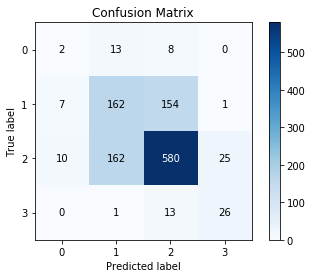

In [255]:
#Confusion Matrix
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

### KNN 

In [256]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# initialize KNeighborsClassifier() and train a KNN Model


knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [257]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, knn.predict(X_test)))

0.5936426116838488
--------------------------------------------------------
[[  0  10  24   0]
 [  2  97 233   0]
 [  2 157 591   3]
 [  0   4  38   3]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.36      0.29      0.32       332
           2       0.67      0.78      0.72       753
           3       0.50      0.07      0.12        45

   micro avg       0.59      0.59      0.59      1164
   macro avg       0.38      0.29      0.29      1164
weighted avg       0.55      0.59      0.56      1164



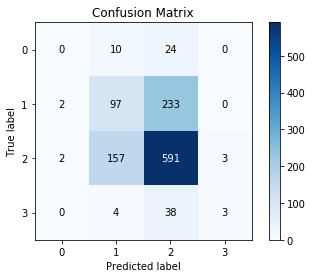

In [258]:
## Pretty good results from KNN

import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=knn.predict(X_test))
plt.show()

### Random Forrest Classifier

In [259]:
#Random Forrest Classifier model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7061855670103093

In [260]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.7061855670103093
[[  1  19  14   0]
 [  2 169 161   0]
 [  3 113 632   5]
 [  0   0  25  20]]
              precision    recall  f1-score   support

           0       0.17      0.03      0.05        34
           1       0.56      0.51      0.53       332
           2       0.76      0.84      0.80       753
           3       0.80      0.44      0.57        45

   micro avg       0.71      0.71      0.71      1164
   macro avg       0.57      0.46      0.49      1164
weighted avg       0.69      0.71      0.69      1164



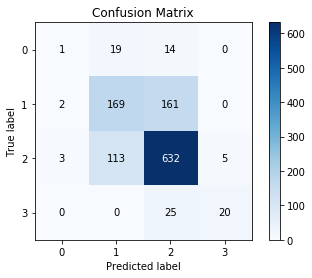

In [261]:
skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=clf.predict(X_test))
plt.show()

# Clustering analysis

In [262]:
#Import Clustering Analysis packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

In [263]:
#Check variance
df2.var()

num_critic_for_reviews       1.537995e+04
duration                     5.146158e+02
actor_3_facebook_likes       3.485845e+06
actor_1_facebook_likes       2.365430e+08
gross                        4.880491e+15
num_voted_users              2.275911e+10
cast_total_facebook_likes    3.589251e+08
num_user_for_reviews         1.667613e+05
budget                       4.960180e+16
actor_2_facebook_likes       2.015120e+07
imdb_score                   1.116093e+00
movie_facebook_likes         4.549911e+08
profit                       5.130643e+16
imdb_score_bins              3.394004e-01
dtype: float64

In [264]:
#Drop bins variable 
df3 = df2.drop(['imdb_score_bins'],axis=1)

In [265]:
#Normalize data
df3norm = (df3 - df3.mean()) / (df3.max() - df3.min())

In [266]:
#Drop y variable in X variable
X = df3norm.drop(['imdb_score'], axis=1)

In [267]:
#Check variance again
X.var()

num_critic_for_reviews       0.023326
duration                     0.005874
actor_3_facebook_likes       0.006589
actor_1_facebook_likes       0.000577
gross                        0.008438
num_voted_users              0.007971
cast_total_facebook_likes    0.000832
num_user_for_reviews         0.006516
budget                       0.000332
actor_2_facebook_likes       0.001074
movie_facebook_likes         0.003736
profit                       0.000316
dtype: float64

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

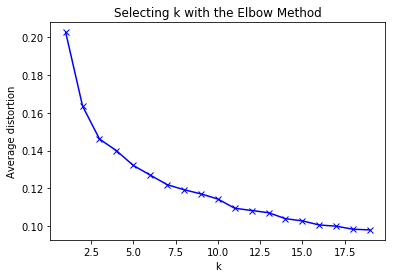

In [268]:
#Conduct Elbow Method to determine amount of clusters
from scipy.spatial.distance import cdist 

K = range(1, 20) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=1) 
    kmeans.fit(X) 
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 

In [269]:
#Create k_means with 8 clusters
k_means = KMeans(init='k-means++', n_clusters=5, random_state=0)

In [270]:
#Fit k_means
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [271]:
#clustering results
k_means.labels_

array([4, 4, 1, ..., 0, 0, 0])

In [272]:
#cluster centroids or centers
k_means.cluster_centers_

array([[-1.10793440e-01, -1.80010901e-02, -1.46995823e-02,
        -4.36196351e-03, -3.67924112e-02, -4.48332707e-02,
        -6.42385781e-03, -3.88770264e-02, -1.54124711e-03,
        -6.54490693e-03, -2.35973337e-02, -7.18683731e-04],
       [ 2.71550442e-01,  1.97991973e-02, -6.73364198e-03,
         4.03887761e-03,  3.38831044e-02,  6.50336695e-02,
         4.77645120e-03,  5.04090295e-02,  3.72181711e-03,
         5.54990121e-03,  8.29573467e-02, -1.54635039e-03],
       [ 1.96375952e-01,  4.40722045e-02,  4.83031726e-01,
         3.65469803e-02,  1.32064570e-01,  9.82598118e-02,
         8.06879290e-02,  6.56620871e-02,  3.99813221e-03,
         9.78991322e-02,  8.24051999e-02,  4.05099044e-03],
       [ 3.65314279e-02,  6.13372331e-03, -1.02101445e-02,
         1.90258452e-03,  6.95520718e-03,  7.32116841e-03,
         1.27948886e-03,  9.09103005e-03,  2.46250994e-04,
        -3.41158095e-04, -6.07342186e-03,  1.79118369e-04],
       [ 2.70352323e-01,  1.01363871e-01,  1.3598260

In [273]:
#To add cluster label into the dataset as a column
dfkmeans = pd.DataFrame(k_means.labels_, columns = ['cluster'])
dfkmeans.head()

,cluster
0,4
1,4
2,1
3,2
4,1


In [274]:
#Join into new dataframe
df4 = df3.join(dfkmeans)
df4.head(5)

,num_critic_for_reviews,duration,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,cluster
0,723.0,178.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,936.0,7.9,33000,523505847.0,4.0
1,302.0,169.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,5000.0,7.1,0,9404152.0,4.0
2,602.0,148.0,161.0,11000.0,200074175.0,275868,11700,994.0,245000000.0,393.0,6.8,85000,-44925825.0,1.0
3,813.0,164.0,23000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,23000.0,8.5,164000,198130642.0,2.0
5,462.0,132.0,530.0,640.0,73058679.0,212204,1873,738.0,263700000.0,632.0,6.6,24000,-190641321.0,4.0


In [275]:
#Show size of each cluster
df4.groupby(['cluster']).size()

cluster
0.0    1589
1.0     349
2.0      85
3.0    1157
4.0     134
dtype: int64

In [276]:
#Show mean of each cluster
df4.groupby(['cluster']).mean()

,num_critic_for_reviews,duration,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit
cluster,,,,,,,,,,,,,
0.0,151.326621,109.916929,695.714286,7176.505349,4.346500e+07,94340.277533,10556.069855,297.390183,4.476902e+07,1731.115167,6.431655,7657.523600,-1.304028e+06
1.0,192.068768,113.501433,910.756447,8454.160458,7.888899e+07,138462.309456,13039.650430,426.911175,6.167099e+07,2400.934097,6.428940,11670.501433,1.721800e+07
2.0,233.600000,122.000000,1445.776471,9587.541176,1.016338e+08,176743.847059,16898.458824,540.352941,8.958235e+07,4079.929412,6.500000,18643.988235,1.205142e+07
3.0,177.310285,111.871219,876.928263,8982.094209,5.824098e+07,113542.832325,13299.204840,352.872947,4.816462e+07,2438.194468,6.408124,10219.808989,1.007635e+07
4.0,273.701493,120.417910,1462.977612,11648.828358,1.372310e+08,217159.283582,18313.664179,649.432836,1.147239e+08,3676.223881,6.720896,23721.485075,2.250713e+07


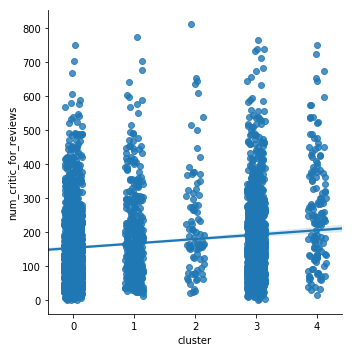

In [277]:
sns.lmplot("cluster", "num_critic_for_reviews", df4, x_jitter=.15, y_jitter=.15)

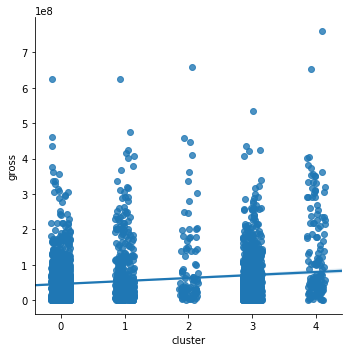

In [278]:
sns.lmplot("cluster", "gross", df4, x_jitter=.15, y_jitter=.15)

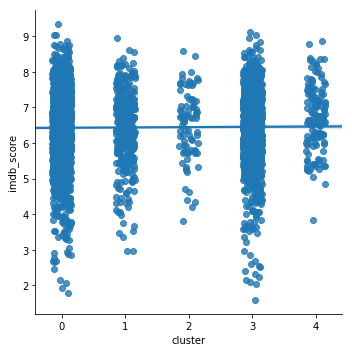

In [279]:
sns.lmplot("cluster", "imdb_score", df4, x_jitter=.15, y_jitter=.15)

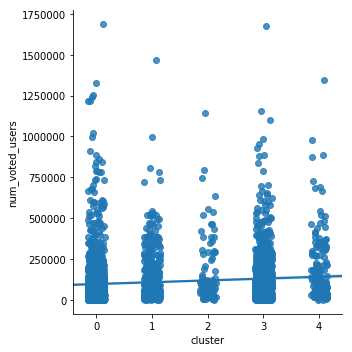

In [280]:
sns.lmplot("cluster", "num_voted_users", df4, x_jitter=.15, y_jitter=.15)

### Hierarchical Clustering

In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.metrics import pairwise_distances

In [285]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=5, linkage='ward').fit(X)
agg.labels_

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

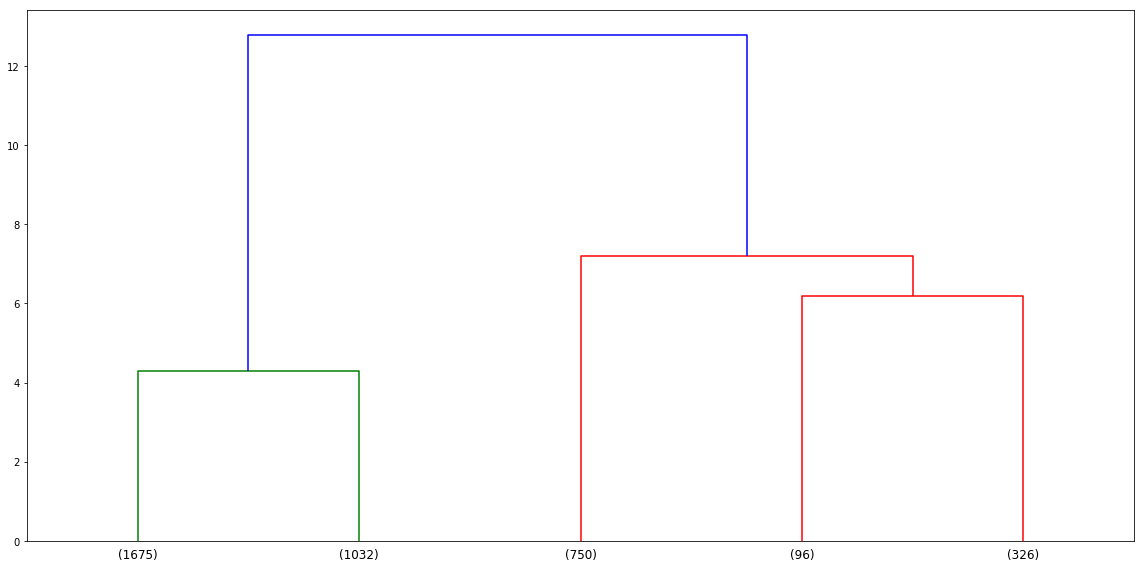

In [284]:
plt.figure(figsize=(16,8))

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="top", truncate_mode='lastp', p=5)
plt.tight_layout() # fixes margins

In [287]:
#To add cluster label into the dataset as a column
df5 = pd.DataFrame(agg.labels_, columns = ['cluster'])
df5.head()

,cluster
0,0
1,0
2,0
3,3
4,0


In [288]:
df6 = df2.join(df5)
df6.head()

,num_critic_for_reviews,duration,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,imdb_score_bins,cluster
0,723.0,178.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,936.0,7.9,33000,523505847.0,2,0.0
1,302.0,169.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,5000.0,7.1,0,9404152.0,2,0.0
2,602.0,148.0,161.0,11000.0,200074175.0,275868,11700,994.0,245000000.0,393.0,6.8,85000,-44925825.0,2,0.0
3,813.0,164.0,23000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,23000.0,8.5,164000,198130642.0,3,3.0
5,462.0,132.0,530.0,640.0,73058679.0,212204,1873,738.0,263700000.0,632.0,6.6,24000,-190641321.0,2,0.0


In [289]:
df6.groupby('cluster').size()

cluster
0.0     295
1.0     891
2.0     658
3.0      93
4.0    1377
dtype: int64

In [290]:
df6.groupby('cluster').mean()

,num_critic_for_reviews,duration,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit
cluster,,,,,,,,,,,,,
0.0,243.193220,117.850847,1263.989831,10171.020339,1.120534e+08,182031.935593,16152.603390,559.755932,9.307836e+07,3267.142373,6.607797,19493.233898,1.897501e+07
1.0,172.756453,110.707071,864.536476,9270.289562,5.459788e+07,113073.180696,13516.466891,345.536476,4.409685e+07,2332.933782,6.425140,9611.854097,1.050103e+07
2.0,177.182371,112.197568,835.808511,8229.244681,6.052984e+07,114863.720365,12391.358663,356.553191,4.889055e+07,2303.693009,6.373556,9981.591185,1.163928e+07
3.0,230.354839,121.655914,1366.021505,8992.967742,1.037000e+08,175618.634409,15997.268817,540.397849,8.765054e+07,3934.795699,6.503226,17425.451613,1.604944e+07
4.0,149.232389,110.141612,680.246187,6979.424837,4.345359e+07,92491.785766,10277.823529,294.047204,4.669952e+07,1688.344227,6.432970,7498.494553,-3.245931e+06


# Final analysis & storytelling

### Regression

We attempted 3 different approaches to regression models. Multiple Regression, Multiple Regression with Regularization, and a model using feature selection. Of these three models, Multiple Regression without Regularization provided the best results. I had the feature selection provide me with 5 of the best variables to use in the model, and we got the following 5 variables:

1) num_critic_for_reviews
2) duration
3) num_voted_users
4) num_user_for_reviews
5) movie_facebook_likes 

### Regression Continued
The feature selection model was helpful in identifying the 5 most important variables, however, the model didn't prove to be very accurate. Looking at the multiple regression model, it used all of the float variables and used them to create a model with the following validity:

mean square error:  0.7614447383456427

variance or r-squared:  0.31758296518682183

This model isn't exactly ideal... with an R-squared value being low.. but it is certainly a great place to start!

### Classification

In order to do classification we had to create 4 bins using the imdb_score. You an see above the four bins and that 0 was the worst score and 3 was the best scores. Next we used three classification methods in order to compare and find the most valuable classification model. We used Decision Tree, KNN, and Random Forrest Classifier. 

Random Forrest Classifier proved to be the most accurate with an accuracy of 73.2%. You can see by the confusion matrix, it predicted most of the bins correctly, with most of the erros coming from a confusion between bins 1 & 2 which seem to be very similar at first glance. Using Random Forrest Classifier, you get a model that is fairly reliable, but still not a tool you can completely trust.

### Clustering

We wanted to use clustering to create natural profiles for the different movies and hopefully find profiles that seem to perform higher. After normalizing the data, we used the elbow method to determine how many clusters would be ideal. It was hard to tell exactly, but I decided, based on the chart to divide up into 5 clusters. You can find my understanding of the 5 profiles below using the k-means method:

1) Cluster 0 was definitely the lowest performing cluster of the 5. In almost every single category, the cluster performed lower than all the other clusters, especially in profit. However, didn't find themselves in last for imdb score.

2) Cluster 1 was in the middle of the pack for most of the mean comparisions. However, they were top two in both budget and profit and still found themselves in the middle of the pack for imdb score. 

### Clustering Continued

3) Cluster 2 was second highest across the board except for profit, where they were third. This cluster was the most consistent cluster in all their mean comparisions and their imdb score reflected that as well.

4) Cluster 3 ranked in second worst in every category, so the opposite of cluster 2 basically. However, this cluster ranked at the bottom of imdb scores. I would stay away from this profile if I was creating a movie.

5) Cluster 4 was easily the highest performing cluster in all categories, especially imdb score. However, the movies were on a lot larger of a scale with higher budgets, gross, and profits. I thik it would be ideal to match this cluster profile, but my suspicion is that you need a lot of money to do so.

### Overall takeaways

-- Using regression we identified the 5 most significant variables in predicting high imdb scores:

      1) num_critic_for_reviews 2) duration 3) num_voted_users 4) num_user_for_reviews 5) movie_facebook_likes

-- Using Classification, we discovered that the Random Forrest Classifier was an excellent tool to help predict successful movies based on imdb score

--Lastly, using clustering we were able to identify different movie profiles based on the different clusters. We found that cluster 4 would provide the highest results across the board, however may take large financial backing, so if the backing doesn't exist, cluster 2 or 1 may be the next best option.